
<h1> <center>Anaylyzing freeCodeCamp.org 's Market</center></h1>
<h3> <center>Finding the best markets to advertise in for paid courses on Web development</center></h3>

freeCodeCamp is a non-profit organization that consists of an interactive learning web platform, an online community forum, chat rooms, online publications and local organizations that intend to make learning web development accessible to anyone.

The dataset of freeCodeCamp.org 's open survey carried out on the coders who are customers is used for the purpose of the project. <a href="https://github.com/freeCodeCamp/2017-new-coder-survey">Link</a><br>
The aim of the project is to carry out analysis on the dataset to find the top markets of freeCodeCamp to which paid online Coding courses should be advertised in. A few questions to answer in the course of the analysis :-

   1. What are the Top fields customers are interested in? How many of these customers are interested in Web - Development?
   2. Which are the biggest markets for freeCodeCamp.org?
   3. For the biggest markets, what is the share for potential customers?
   4. In what countries should freeCodeCamp advertise in, for their paid online courses?
    
The dataset in use. A few column description :-

     Age - Age of the coder (customer)
     AttendedBootCamp - A binary value to denote whether coder enrolled for a Bootcamp
     CountryLive - Current Country the coder resides in
     CountryCitizen - Country where the coder hails from
     JobRoleInterest - Job roles (fields) the coder is interested in (can be multiple)
     MoneyForLearning - Amount of money spent in total to learn coding (not neccessarily on freeCodeCamp.org)
     MonthsProgramming - Number of months the coder has been programming for
     
The inital step would be to explore the dataset and identify the relevant columns to carry out the analysis.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from pywaffle import Waffle

In [101]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
df.head(10)

/home/hp/anaconda3/envs/r_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   
5  28.0               0.0             NaN                NaN          NaN   
6  29.0               0.0             NaN                NaN          NaN   
7  29.0               0.0             NaN                NaN          NaN   
8  23.0               0.0             NaN                NaN          NaN   
9  24.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   
5                NaN             NaN              less than 100,000   
6                NaN             NaN  between 100,000 and 1 million   
7                NaN             NaN  between 100,000 and 1 million   
8                NaN             NaN              less than 100,000   
9                NaN             NaN            more than 1 million   

   CodeEventConferences  CodeEventDjangoGirls  ...  YouTubeFCC  \
0                   NaN                   NaN  ...         NaN   
1                   NaN                   NaN  ...         1.0   
2                   NaN                   NaN  ...         NaN   
3                   NaN                   NaN  ...         1.0   
4                   NaN                   NaN  ...         NaN   
5                   NaN                   NaN  ...         NaN   
6                   1.0                   NaN  ...         NaN   
7                   NaN                   NaN  ...         1.0   
8                   NaN                   NaN  ...         NaN   
9                   1.0                   NaN  ...         1.0   

   YouTubeFunFunFunction  YouTubeGoogleDev  YouTubeLearnCode  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2                    NaN               NaN               1.0   
3                    1.0               NaN               NaN   
4                    NaN               NaN               NaN   
5                    NaN               NaN               NaN   
6                    NaN               NaN               NaN   
7                    1.0               NaN               NaN   
8                    NaN               NaN               NaN   
9                    1.0               NaN               1.0   

   YouTubeLevelUpTuts  YouTubeMIT  YouTubeMozillaHacks         YouTubeOther  \
0                 NaN         NaN                  NaN                  NaN   
1                 NaN         NaN                  NaN                  NaN   
2                 1.0         NaN                  NaN                  NaN   
3                 1.0         NaN                  NaN                  NaN   
4                 NaN         NaN                  NaN                  NaN   
5                 NaN         NaN                  NaN  CodingEntrepreneurs   
6                 NaN         NaN                  NaN                  NaN   
7                 NaN         NaN                  NaN                  NaN   
8                 NaN         NaN                  NaN                  NaN   
9                 1.0         1.0                  NaN                  NaN   

   YouTubeSimplilearn  YouTubeTheNewBoston  
0                 NaN      

In [102]:
for col in df.columns:
    print(col)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


From all the columns, the columns that are relevant to the analysis are :-

* Age
* AttendedBootCamp
* CountryLive
* CountryCitizen
* JobRoleInterest
* MoneyForLearning
* MonthsProgramming

Since the goal is to find the best market to advertise in, the collection of the above columns are relevant.

In [103]:
cols = [
    'Age',
    'AttendedBootcamp',
    'CountryLive',
    'CountryCitizen',
    'JobRoleInterest',
    'MoneyForLearning',
    'MonthsProgramming'
]
df = df[cols]

The Website offers courses for programmers on various topics, predominantly on Web Development.<br>
The first question is to analyze the top fields the customers are interested in and if there are customers with interests mainly in the field of `Web Development`.<br>

The need is to find the percentage of people interested in all the fields mentioned in the *JobRoleInterest*. The *JobRoleInterest* column as mentioned before describes the interest(s) of the customer filling the survey. Since a customer can have multiple choices, for the ease of analysis, the assumption - Irrespective of interests a person has listed, for each field the occurence amongst the customers (coders) is counted - is made.<br>
For the analysis, all rows contained NaN values for the *JobRoleInterest* are irrelevant.

In [104]:
df = df.dropna(subset=['JobRoleInterest'])

In [105]:
Job_interests = df.JobRoleInterest.str.split(',').dropna()
flattened = np.array(list(chain(*Job_interests)))
Top_10_fields = pd.Series(flattened).str.strip().str.lower().value_counts(normalize=True).sort_values(ascending=False).iloc[:10]
Top_10_fields

full-stack web developer    0.185752
front-end web developer     0.156327
back-end web developer      0.122655
mobile developer            0.101991
data scientist              0.072699
game developer              0.072035
user experience designer    0.065000
information security        0.058673
data engineer               0.055221
devops / sysadmin           0.041018
dtype: float64

([], <a list of 0 Text xticklabel objects>)

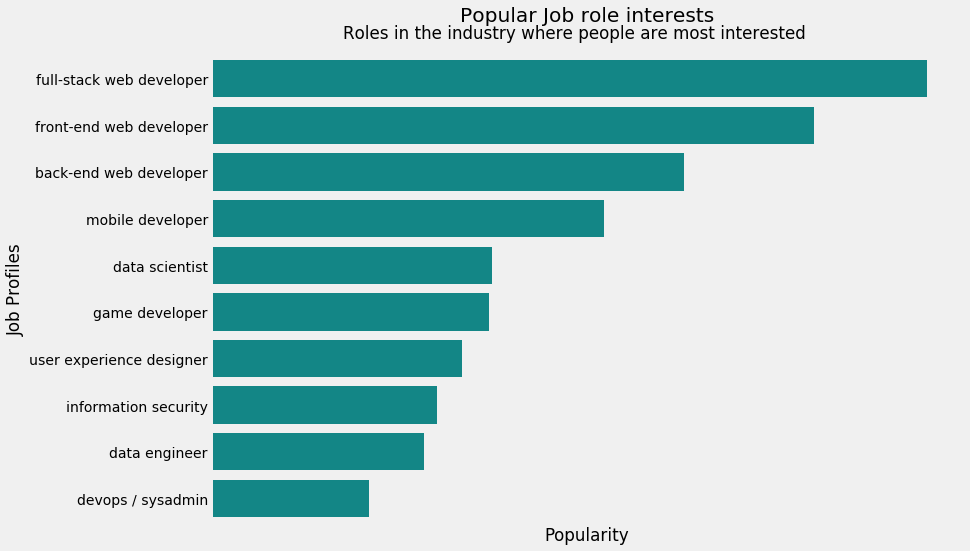

In [106]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    y= Top_10_fields.index,
    x= Top_10_fields.values,
    orient= 'h',
    color='#009999'
)
plt.title('Popular Job role interests',y=1.06)
plt.suptitle('Roles in the industry where people are most interested',y=0.935)
plt.ylabel('Job Profiles')
plt.xlabel('Popularity')
plt.xticks([])

From the assumption, the percentages were calculated for the occurence of a field in the interests of the coders/customers. These percentages are translated into the popularity chart above. The popularity here represents the percentage of customers showing interest in the mentioned fields. The plot shows the top 10 most sought after fields. These are :-

* full-stack web developer
* front-end web developer
* back-end web developer
* mobile developer
* data scientist
* game developer
* user experience designer
* information security
* data engineer
* devops / sysadmin   

These percentages as popularity are not an absolute representation since there exist intersecting people (due to people having multiple interests) meaning that for the calculation of these percentages, some customers have been counted more than once due to multiple interests. It would be natural to assume that they would try to pursue either of them or many of them and hence taking all their choices in to account, the plot considers all count for a field.

Since the organsization focuses on predominantly Web development and the purpose of the project is to find best markets to advertise in for paid courses of Web Development, it would be intuitive to get a good sense of how many customers are interested in Web development compared to all the customers part of the survey.

In [107]:
df['Interest_WebDev'] = df.JobRoleInterest.apply(lambda x: 'Web Development' if 'Web Developer' in x else 'others')
df.head(3)

Age  AttendedBootcamp               CountryLive            CountryCitizen  \
1  34.0               0.0  United States of America  United States of America   
2  21.0               0.0  United States of America  United States of America   
3  26.0               0.0                    Brazil                    Brazil   

                                     JobRoleInterest  MoneyForLearning  \
1                           Full-Stack Web Developer              80.0   
2    Front-End Web Developer, Back-End Web Develo...            1000.0   
3    Front-End Web Developer, Full-Stack Web Deve...               0.0   

   MonthsProgramming  Interest_WebDev  
1                6.0  Web Development  
2                5.0  Web Development  
3                5.0  Web Development

([<matplotlib.axis.YTick at 0x7f07c3d25a50>,
 <a list of 3 Text yticklabel objects>)

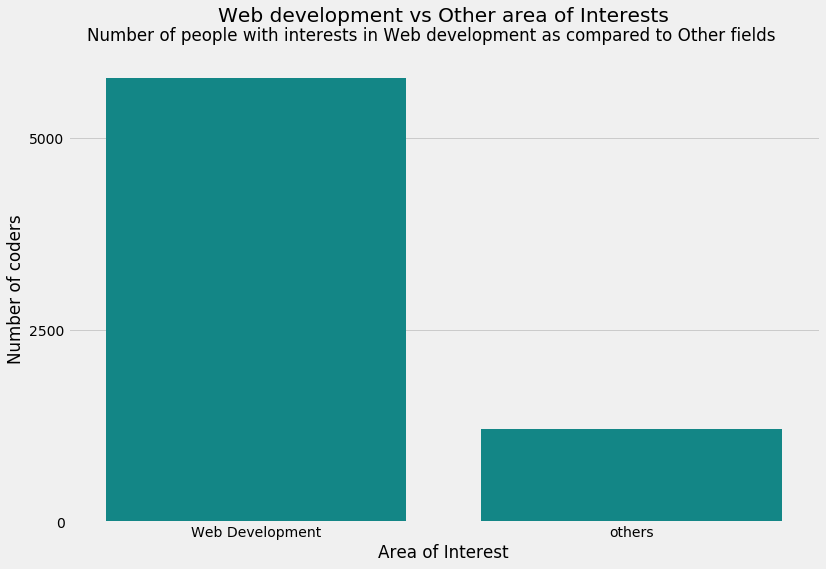

In [108]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.countplot(df.Interest_WebDev, color='#009999')
plt.xlabel('Area of Interest')
plt.ylabel('Number of coders')
plt.title('Web development vs Other area of Interests',y=1.06)
plt.suptitle('Number of people with interests in Web development as compared to Other fields',y=0.931)
plt.yticks([0,2500,5000])

A huge majority of customers are interested in `Web-Development`. And these are absolute counts as even a customer having multiple Interests, if is interested in Web-development, then is counted so.<br>
From this analysis, there is a clear idea of the inclinations of the customers of the organization.<br>

In order to find the best markets, knowing the market size is crucial. Market size for the analysis is defined as the total number of customers belonging to a country. In simple words number of customers from each country indicates the Market sizes for each.

The locations of the customers are given in two columns *CountryCitizen* which describes where the customer hails from and *CountryLive* describes where the customer currently lives. The current country of residence for all customers will count towards the respective market sizes.<br>
The assumption made for the analysis is that each country is an individual market and hence the goal is of answering the question - which are the top markets for the website, subsequently becomes to find the top countries with good number of potential customers.

In [109]:
Top_5_country = df.CountryLive.value_counts(normalize=True).iloc[:5]
Top_5_country

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

([], <a list of 0 Text xticklabel objects>)

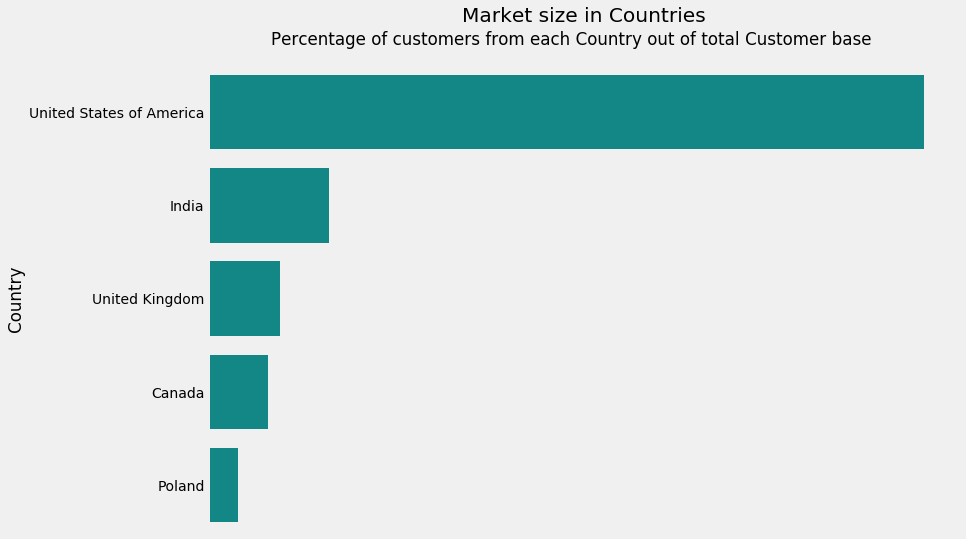

In [110]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    y= Top_5_country.index,
    x= Top_5_country.values,
    orient = 'h',
    color= '#009999'
)
plt.title('Market size in Countries',y=1.08)
plt.suptitle('Percentage of customers from each Country out of total Customer base',y=0.94)
# plt.xlabel('Market Size')
plt.ylabel('Country')
plt.xticks([])

From the preliminary analysis, the top 5 countries with biggest markets (largest customer base) among all the countries where the customers are spread are :-

* United States of America
* India
* United Kingdom
* Canada
* Poland

In that order.<br>
From the plot, the conclusions drawn are :-

* United States of America is the largest market for freeCodeCamp organization.
* The difference between USA and rest of the countries in terms of market size is huge, this could indicate the organizations marketing strategy uptill now.

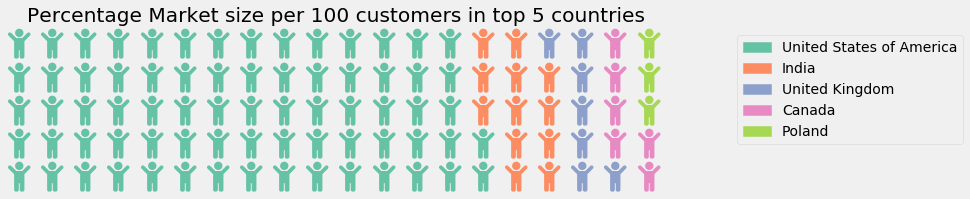

In [140]:
plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=dict(Top_5_country),
    icons='child',
    figsize=(14,6),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    font_size=30,
    title={'label':'Percentage Market size per 100 customers in top 5 countries','loc':'center'}
)
plt.show()

The market size doesn't always translate to potential customers. Within this market of programmers who want to learn, the segment of the customers willing to spend money to learn can be translated into potential customers for the paid courses .<br>
Analysis on the purchasing power of the customers for each market can give good estimates of lucrative price points and potential market size.

The columns *MoneyForLearning* and *MonthsProgramming* describe the total amount spent for learning and the number of months the customer has now been engaged with coding respectively. These columns can be used to estimate the rough amount a customer spends (in dollars) per month to learn.<br>
There are customers with *MonthsProgrmming* as 0, since to estimate the spending per month for each customer, the total money spent is divided by the total months the customer has been engaged in coding. For this purpose, the 0s are converted to 1s to avoid `ZeroDivisionError`

In [112]:
mask = (df.MonthsProgramming == 0)
df.MonthsProgramming = df.MonthsProgramming.mask(mask,1)

In [113]:
df['spend_per_month'] = df.MoneyForLearning / df.MonthsProgramming
df[['MoneyForLearning','MonthsProgramming','spend_per_month']].head(7)

MoneyForLearning  MonthsProgramming  spend_per_month
1               80.0                6.0        13.333333
2             1000.0                5.0       200.000000
3                0.0                5.0         0.000000
4                0.0               24.0         0.000000
6                0.0               12.0         0.000000
9              100.0               18.0         5.555556
11               0.0                1.0         0.000000

In [114]:
df.spend_per_month.isna().sum()

675

For the anaylsis, all those data points containing NaN values for *spend_per_month* and *CountryLive* are to be removed, since these values cannot be imputed from the data nor contribute to loss of information.

In [115]:
df = df[~((df.spend_per_month.isna()) | (df.CountryLive.isna()))]
df.head(3)

Age  AttendedBootcamp               CountryLive            CountryCitizen  \
1  34.0               0.0  United States of America  United States of America   
2  21.0               0.0  United States of America  United States of America   
3  26.0               0.0                    Brazil                    Brazil   

                                     JobRoleInterest  MoneyForLearning  \
1                           Full-Stack Web Developer              80.0   
2    Front-End Web Developer, Back-End Web Develo...            1000.0   
3    Front-End Web Developer, Full-Stack Web Deve...               0.0   

   MonthsProgramming  Interest_WebDev  spend_per_month  
1                6.0  Web Development        13.333333  
2                5.0  Web Development       200.000000  
3                5.0  Web Development         0.000000

The average spending rate of customers per month can be used a metric to estimate the potential customers of a market. Thus the column *CountryLive* is grouped and aggregated on the *spend_per_month* column using `numpy.mean`. The average spending per month indicates the purchasing power of customers of a market (country).

In [116]:
grouped = df[['CountryLive','spend_per_month']].groupby(['CountryLive'])
spending_power = grouped.mean()
spending_power.sort_values('spend_per_month',ascending=False)

spend_per_month
CountryLive                 
Yemen           10000.000000
Puerto Rico      4291.394558
Austria           936.208333
Spain             784.553084
Jamaica           747.037037
...                      ...
Honduras            0.000000
Jordan              0.000000
Mozambique          0.000000
Nambia              0.000000
Kyrgyzstan          0.000000

[131 rows x 1 columns]

From the previous analysis, 5 countries have been identified with the largest markets. The analysis from here on will strictly stick to these 5 countries only.

In [117]:
countries = list(Top_5_country.index)
spending_power.loc[countries]

spend_per_month
CountryLive                              
United States of America       227.997996
India                          135.100982
United Kingdom                  45.534443
Canada                         113.510961
Poland                          75.678935

The table above is not a correct representative of the actual situation. Countries like United Kingdom and Canada have lesser purchasing power than India is what is shown. Looking into the socio-economic background of countries, the United Kingdom and Canada must have more purchasing power in general as compared to India. <br>
The purchasing power derived here is a per customer metric i.e. the calculation of purchasing power was done for each customer and then averaged over all customers for a country. India has a high *spend_per_month* due to the sheer size of population and variability whereas United Kingdom and Canada have less representative data or lesser population in reality. This leads to the false pretence.
The data consists of outliers as well, giving such high results for India.

To locate the outliers a `boxplot` for each country with respect to the variable *spend_per_month* is the best choice.

Text(0.5, 0, 'Country')

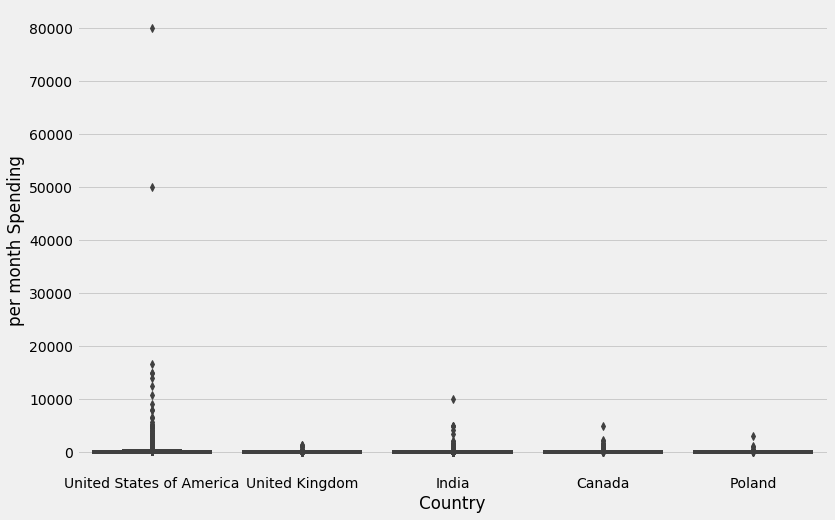

In [118]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.boxplot(
    y='spend_per_month',
    x='CountryLive',
    data= df[df.CountryLive.str.contains(
        'United States of America|India|United Kingdom|Canada|Poland'
    )]
)
plt.ylabel('per month Spending')
plt.xlabel('Country')

The outliers are very extreme. spending per month going upto 80000 dollars is absurd. Hence an upper bound is set at 10000 and any spendings beyond 10000 are removed.<br>

In [119]:
df = df[~(df.spend_per_month > 10000)]

Re-plotting the box plot, to analyze the new bound data.

Text(0.5, 0, 'Country')

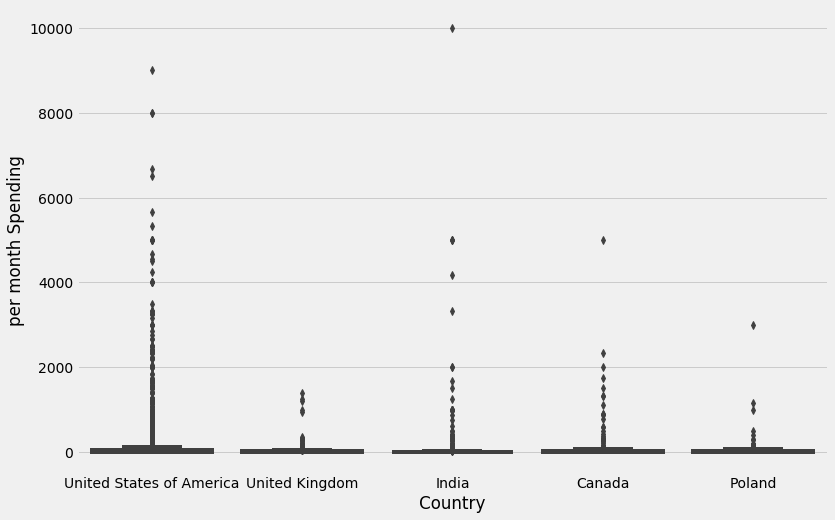

In [120]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.boxplot(
    y='spend_per_month',
    x='CountryLive',
    data= df[df.CountryLive.str.contains(
        'United States of America|India|United Kingdom|Canada|Poland'
    )]
)
plt.ylabel('per month Spending')
plt.xlabel('Country')

There still exists a high number of outliers for all these 5 countries. Granular analysis has to be carried out for each country individually to understand these high spending rates, greater than 500 dollars.<br>
If the customer has ever participated in a bootcamp then such a expenditure is valid, else it is probably faulty data. To analyze on this point, the data is checked.<br>

In [121]:
mask = (df.spend_per_month > 500) & (df.CountryLive == 'India')
df[mask]

Age  AttendedBootcamp CountryLive CountryCitizen  \
987    25.0               0.0       India          India   
1728   24.0               0.0       India          India   
1755   20.0               0.0       India          India   
1810   23.0               0.0       India          India   
5218   22.0               0.0       India          India   
5274   20.0               0.0       India          India   
6350   24.0               0.0       India          India   
6913   21.0               1.0       India          India   
7255   22.0               0.0       India          India   
7962   21.0               0.0       India          India   
7989   28.0               0.0       India          India   
8126   22.0               0.0       India          India   
8204   21.0               0.0       India          India   
9410   38.0               0.0       India          India   
9926   22.0               0.0       India          India   
12435  22.0               0.0       India          India   
12451  24.0               0.0       India          India   
13398  19.0               0.0       India          India   
13583  24.0               0.0       India          India   
15587  27.0               0.0       India          India   
15726  26.0               0.0       India          India   
18156  29.0               0.0       India          India   

                                         JobRoleInterest  MoneyForLearning  \
987      DevOps / SysAdmin, Back-End Web Developer, F...            1000.0   
1728     User Experience Designer,   Mobile Developer...           20000.0   
1755   Information Security, Full-Stack Web Developer...           50000.0   
1810                            Full-Stack Web Developer            5000.0   
5218     DevOps / SysAdmin,   Product Manager, Inform...            1500.0   
5274   Game Developer,   User Experience Designer, In...            3500.0   
6350                            Full-Stack Web Developer           15000.0   
6913     Mobile Developer, Full-Stack Web Developer, ...            5000.0   
7255     Quality Assurance Engineer,   Mobile Develop...            3000.0   
7962                            Full-Stack Web Developer           10000.0   
7989     User Experience Designer, Back-End Web Devel...            5000.0   
8126   Back-End Web Developer, Full-Stack Web Develop...            5000.0   
8204     User Experience Designer,   DevOps / SysAdmi...           20000.0   
9410     User Experience Designer,   Data Scientist, ...            2000.0   
9926                                      Game Developer           10000.0   
12435  Back-End Web Developer, Full-Stack Web Develop...            2500.0   
12451        Mobile Developer,   Front-End Web Developer            8000.0   
13398                                   Mobile Developer           20000.0   
13583                           Full-Stack Web Developer            1000.0   
15587         Full-Stack Web Developer,   Data Scientist          100000.0   
15726    Mobile Developer,   Front-End Web Developer,...            1000.0   
18156                           Full-Stack Web Developer            1000.0   

       MonthsProgramming  Interest_WebDev  spend_per_month  
987                  1.0  Web Development      1000.000000  
1728                 4.0  Web Development      5000.000000  
1755                15.0  Web Development      3333.333333  
1810                 8.0  Web Development       625.000000  
5218                 2.0           others       750.000000  
5274                 4.0           others       875.000000  
6350                10.0  Web Development      1500.000000  
6913                 3.0  Web Development      1666.666667  
7255                 3.0  Web Development      1000.000000  
7962                10.0  Web Development      1000.000000  
7989                 1.0  Web Development      5000.000000  
8126                 1.0  Web Development      5000.000000  
8204                20.0  Web Developme

Only one customer has attended a bootcamp and hence a spending of 5000 dollars is valid, but that customer has been programming for 3 months only. This means that the customer is unlikely to spend any money for the next few months. Since the customer has recently enrolled in a bootcamp and is likely in the middle of one, that customer is unlikely to purchase anything more.<br>
All the customers who have high spending without ever attending a bootcamp, or have enrolled in a bootcamp as recent as within 3 months, are irrelevant to the end goal and are thus removed.

In [122]:
df = df[~mask]

The above was done for India. On similar lines, United Kingdom and Canada are analyzed.

In [123]:
mask = (df.spend_per_month > 500) & (df.CountryLive == 'United Kingdom')
df[mask]

Age  AttendedBootcamp     CountryLive  CountryCitizen  \
3645   34.0               0.0  United Kingdom  Czech Republic   
6127   23.0               1.0  United Kingdom        Slovakia   
8948   40.0               1.0  United Kingdom        Portugal   
13345  25.0               0.0  United Kingdom  United Kingdom   
16552  37.0               0.0  United Kingdom          Poland   

                                         JobRoleInterest  MoneyForLearning  \
3645                             Front-End Web Developer            1200.0   
6127   Full-Stack Web Developer,   Front-End Web Deve...           10000.0   
8948     Mobile Developer, Full-Stack Web Developer, ...            7000.0   
13345  Back-End Web Developer,   Front-End Web Develo...            3747.0   
16552                           Full-Stack Web Developer            1000.0   

       MonthsProgramming  Interest_WebDev  spend_per_month  
3645                 1.0  Web Development          1200.00  
6127                 8.0  Web Development          1250.00  
8948                 5.0  Web Development          1400.00  
13345                4.0  Web Development           936.75  
16552                1.0  Web Development          1000.00

Out of the 5 customers, only two have attended a bootcamp and it isnt a recent activity, their high spending per month is thus valid. All other customers (the remaining 3) are removed from the sample.

In [124]:
mask = (df.spend_per_month > 500) & (df.CountryLive == 'United Kingdom') & (df.AttendedBootcamp == 0)
df = df[~mask]

In [125]:
mask = (df.spend_per_month > 500) & (df.CountryLive == 'Canada')
df[mask]

Age  AttendedBootcamp CountryLive  CountryCitizen  \
1229   20.0               0.0      Canada          Canada   
4250   49.0               0.0      Canada          Canada   
4348   29.0               1.0      Canada  United Kingdom   
6400   31.0               1.0      Canada          Canada   
6590   20.0               1.0      Canada          Canada   
7193   22.0               0.0      Canada      Kazakhstan   
8726   39.0               0.0      Canada          Canada   
12272  35.0               1.0      Canada          Canada   
13027  31.0               0.0      Canada          Canada   
13627  26.0               1.0      Canada          Canada   
13659  24.0               1.0      Canada          Canada   
16707  36.0               1.0      Canada          Canada   
17795  38.0               0.0      Canada          Canada   
17911  35.0               0.0      Canada       Venezuela   

                                         JobRoleInterest  MoneyForLearning  \
1229     Mobile Developer,   Front-End Web Developer,...           14000.0   
4250                            Full-Stack Web Developer            3000.0   
4348     Front-End Web Developer,   Mobile Developer,...            8500.0   
6400                             Front-End Web Developer            8000.0   
6590                  Game Developer,   Mobile Developer           14023.0   
7193              Back-End Web Developer, Game Developer           21000.0   
8726   Full-Stack Web Developer, Back-End Web Develop...            2000.0   
12272                           Full-Stack Web Developer            8000.0   
13027                            Front-End Web Developer            8000.0   
13627  Back-End Web Developer, Full-Stack Web Develop...            7000.0   
13659    Mobile Developer, Full-Stack Web Developer, ...           10000.0   
16707                           Full-Stack Web Developer            9000.0   
17795                            Front-End Web Developer            2600.0   
17911                                   Mobile Developer           22000.0   

       MonthsProgramming  Interest_WebDev  spend_per_month  
1229                24.0  Web Development       583.333333  
4250                 2.0  Web Development      1500.000000  
4348                11.0  Web Development       772.727273  
6400                 6.0  Web Development      1333.333333  
6590                 6.0           others      2337.166667  
7193                12.0  Web Development      1750.000000  
8726                 1.0  Web Development      2000.000000  
12272                9.0  Web Development       888.888889  
13027                6.0  Web Development      1333.333333  
13627               12.0  Web Development       583.333333  
13659                2.0  Web Development      5000.000000  
16707               10.0  Web Development       900.000000  
17795                3.0  Web Development       866.666667  
17911               20.0           others      1100.000000

Similar to India, Canada also has such outliers where either the spending is huge without a bootcamp enrollment or a fresh enrollment into a bootcamp. Thus these customers are removed from the analysis.

In [126]:
df = df[~((mask) & (df.AttendedBootcamp == 0))]
df = df[~(mask & (df.MonthsProgramming <= 3))]

/home/hp/anaconda3/envs/r_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [127]:
mask = (df.spend_per_month > 500) & (df.CountryLive == 'Poland')
df[mask]

Age  AttendedBootcamp CountryLive CountryCitizen  \
1040   28.0               1.0      Poland         Poland   
12805  27.0               0.0      Poland         Poland   
13166  27.0               1.0      Poland         Poland   

                                         JobRoleInterest  MoneyForLearning  \
1040   Full-Stack Web Developer,   Front-End Web Deve...            3000.0   
12805  Full-Stack Web Developer, Back-End Web Develop...            3500.0   
13166                            Front-End Web Developer            3000.0   

       MonthsProgramming  Interest_WebDev  spend_per_month  
1040                 1.0  Web Development      3000.000000  
12805                3.0  Web Development      1166.666667  
13166                3.0  Web Development      1000.000000

For poland as well, thus all the 3 customers are removed.

In [128]:
df = df[~mask]

The United States of America had the most outliers. Looking into them individually.

In [129]:
mask = (df.spend_per_month > 500) & (df.CountryLive == 'United States of America')
df[mask]

Age  AttendedBootcamp               CountryLive  \
234    25.0               0.0  United States of America   
352    27.0               1.0  United States of America   
403    29.0               1.0  United States of America   
414    23.0               1.0  United States of America   
415    26.0               1.0  United States of America   
...     ...               ...                       ...   
17786  38.0               0.0  United States of America   
17849  32.0               0.0  United States of America   
17898  46.0               1.0  United States of America   
17902  42.0               0.0  United States of America   
17953  39.0               1.0  United States of America   

                 CountryCitizen  \
234    United States of America   
352    United States of America   
403    United States of America   
414    United States of America   
415    United States of America   
...                         ...   
17786  United States of America   
17849               New Zealand   
17898  United States of America   
17902  United States of America   
17953  United States of America   

                                         JobRoleInterest  MoneyForLearning  \
234    Data Engineer,   Product Manager,   Mobile Dev...            1200.0   
352      Front-End Web Developer,   Quality Assurance...           10000.0   
403    Full-Stack Web Developer,   Front-End Web Deve...           15000.0   
414                             Full-Stack Web Developer            5400.0   
415    Full-Stack Web Developer,   Front-End Web Deve...           14000.0   
...                                                  ...               ...   
17786  Full-Stack Web Developer, Back-End Web Develop...           11000.0   
17849                           Full-Stack Web Developer            4950.0   
17898    DevOps / SysAdmin,   Front-End Web Developer...           10000.0   
17902    Front-End Web Developer, Back-End Web Develo...            2000.0   
17953    User Experience Designer,   Front-End Web De...           15000.0   

       MonthsProgramming  Interest_WebDev  spend_per_month  
234                  1.0  Web Development      1200.000000  
352                 11.0  Web Development       909.090909  
403                 24.0  Web Development       625.000000  
414                  9.0  Web Development       600.000000  
415                  6.0  Web Development      2333.333333  
...                  ...              ...              ...  
17786                6.0  Web Development      1833.333333  
17849                3.0  Web Development      1650.000000  
17898                6.0  Web Development      1666.666667  
17902                1.0  Web Development      2000.000000  
17953               15.0  Web Development      1000.000000  

[190 rows x 9 columns]

The United States of America also has several outliers. Many with high spending and no enrollment in Bootcamps. There are many who have enrolled in Bootcamps but are new to Programming i.e. less than 3 months. All these customers are removed from the sample.

In [130]:
df = df[~((mask) & (df.AttendedBootcamp == 0))]
df = df[~((mask) & (df.MonthsProgramming <= 3))]

/home/hp/anaconda3/envs/r_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Now that the outliers are removed based on two rules:- 

* High spending is only justified if the customer has enrolled for a bootcamp.
* A customer recently enrolled for a bootcamp (lesser than 3 months) is unlikely to spend more money in the upcoming months.

Keeping the above rules in mind, all such data points were removed from the sample, for these 5 countries.
Grouping the sample again, on *CountryLive* and aggregating on *spend_per_month*.

In [131]:
grouped = df[['CountryLive','spend_per_month']].groupby(['CountryLive'])
spending_power = grouped.mean()
spending_power.sort_values('spend_per_month',ascending=False)

spend_per_month
CountryLive                       
Yemen                 10000.000000
Jamaica                 747.037037
Hong Kong               523.341049
Trinidad & Tobago       500.000000
Taiwan                  417.966524
...                            ...
Honduras                  0.000000
Jordan                    0.000000
Mozambique                0.000000
Nambia                    0.000000
Kyrgyzstan                0.000000

[131 rows x 1 columns]

In [132]:
countries = list(Top_5_country.index)
Countries_of_interest = spending_power.loc[countries]
Countries_of_interest

spend_per_month
CountryLive                              
United States of America        91.109234
India                           25.816526
United Kingdom                  34.664347
Canada                          56.505592
Poland                          34.169441

The purchasing powers for countries have changed and have significantly come closer like India, United Kingdom and Poland. The estimates of purchasing power seem right from a socio-economic aspect.

To get a better sense of the differences in purchasing powers between these 5 countries.

([], <a list of 0 Text yticklabel objects>)

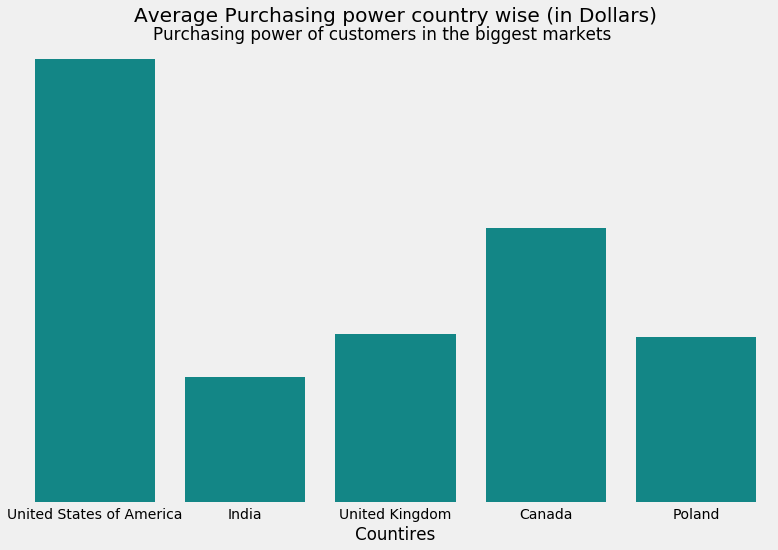

In [133]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=Countries_of_interest.index,
    y=Countries_of_interest.spend_per_month,
    color= '#009999'
)
plt.xlabel('Countires')
# plt.ylabel('Avergae Spending power')
plt.ylabel('')
plt.title('Average Purchasing power country wise (in Dollars)',y=1.02)
plt.suptitle('Purchasing power of customers in the biggest markets',y=0.9)
plt.yticks([])

The results of the plot lead to the following conclusions :-

* The United States of America has the highest average purchasing power among these 5 countries.
* Canada follows USA with the second highest average purchasing power, but the differnce between the two is close to twice.
* India has the least average purchasing power.

The aim was to find the number of potential customers per country and thus identify the right markets to advertise in. The definition of a potential customer thus becomes crucial. Due to lack of data, the potential customer can be assumed to a customer who can has per month spending rate greater than the average purchasing power of the market customer resides in.<br>
With this definition, the potential customers are extracted from these 5 countries.

In [134]:
potential_customer_count ={}

total_pop = len(df)

for country in Countries_of_interest.index:
    mask = (
        (df.CountryLive == country) &
        (df.spend_per_month >= Countries_of_interest.loc[country].spend_per_month)
    )
    potential_customer_count[country] = len(df[mask]) / total_pop

potential_customers = pd.Series(potential_customer_count).loc[countries]
potential_customers

United States of America    0.072111
India                       0.011854
United Kingdom              0.008890
Canada                      0.005268
Poland                      0.004281
dtype: float64

The percentages of all potential customers have been grouped into this table. This table gives the percentage of potential customers out of the total customer base of freeCodeCamp organization. Since the market size calculation was also out of the entire customer base of freeCodeCamp organisation. The comparision between the two valid, as they are on the same scale.

In [135]:
Top_5_country

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

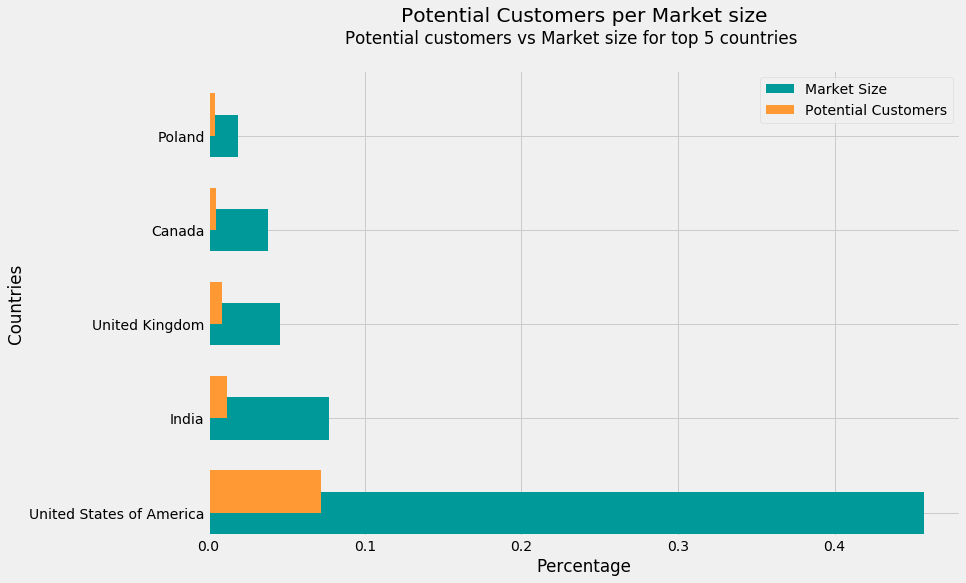

In [136]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
Top_5_country.plot.barh(align='center',color='#009999',width=0.45,label='Market Size')
potential_customers.plot.barh(align='edge',color='#ff9933',width=0.45,label='Potential Customers')
plt.ylabel('Countries')
plt.xlabel('Percentage')
plt.title('Potential Customers per Market size',y=1.09)
plt.suptitle('Potential customers vs Market size for top 5 countries',y=0.95)
plt.legend()

The potential customers in these countries with respect to their market sizes are depicted by this plot.
The conclusions drawn from this plot are :-

* The United States of America has the largest potential customer base (size wise) as compared to its Market size, i.e. about 7% of the 45% of customer base are deemed to be potential customer.
* India has a good number of potential customers as compared to its Market size given the average purchasing power is the least among the 5 countries  i.e about 1% of the 7% of customer base.
* United Kingdom and Canada do not have a good percentage of potential customers as compared to their customer base, though having higher purchasing power than India.


The top 5 countries with respect to the market size have the afore-mentioned potential customer base. The initial purpose of the project was to find potential customers and thus the best markets to advertise in for paid online courses on Web development.<br>

From the initial analysis, it was concluded that more than 5000 customers of the entire customer base are interested in pursuing Web Development. While this statistic shows the trend in inclinations of the entire customer base, it doesnot define the country wise inclinations of customers. It may be the case that only a few countries amass to the global count. This case makes it important to analyze the country wise percentage of customers inclined towards the field of Web Development.

In [137]:
df['WebDevelopment'] = df.Interest_WebDev.apply(lambda x: True if x == 'Web Development' else False)
grouped = df[['CountryLive','WebDevelopment']].groupby('CountryLive')
interested_webdev = grouped.agg({'WebDevelopment':['sum','size']}).reset_index()
interested_webdev = interested_webdev[~(interested_webdev['WebDevelopment']['sum'] == 0)]

In [147]:
final_countries = interested_webdev.set_index('CountryLive').loc[countries]
final_countries['percentage'] = final_coutries[('WebDevelopment',  'sum')] / final_coutries[('WebDevelopment', 'size')]
webdev_interested_pop = final_countries.percentage * Top_5_country
webdev_interested_pop

CountryLive
United States of America    0.378205
India                       0.062858
United Kingdom              0.039390
Canada                      0.030320
Poland                      0.017387
dtype: float64

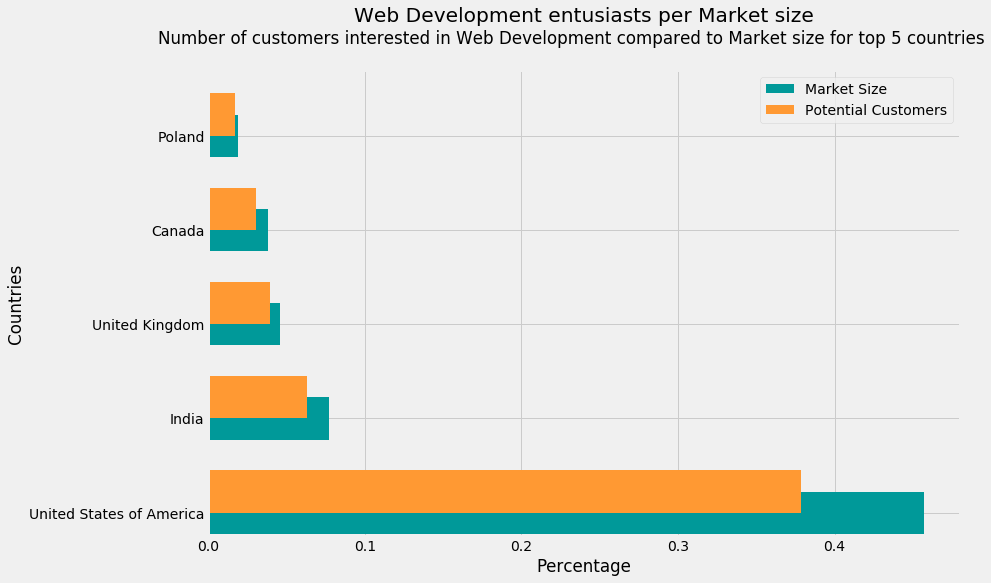

In [149]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
Top_5_country.plot.barh(align='center',color='#009999',width=0.45,label='Market Size')
webdev_interested_pop.plot.barh(align='edge',color='#ff9933',width=0.45,label='Potential Customers')
plt.ylabel('Countries')
plt.xlabel('Percentage')
plt.title('Web Development entusiasts per Market size',y=1.09)
plt.suptitle('Number of customers interested in Web Development compared to Market size for top 5 countries',y=0.95)
plt.legend()

The plot concludes that these 5 countries considered to be the largest markets for freeCodeCamp organisation have a large percentage of those customers interested in the field of Web Development. This solidifies the notion of selecting these 5 countries for analysis.

The purpose of the analysis was to find the best markets to advertise in for paid online courses on Web Development. The project in the end amasses the following conclusions:-

   * Among the entire customer base, the top 10 most sought after fields for job roles are,
       * full-stack web developer   
       * front-end web developer 
       * back-end web developer
       * mobile developer
       * data scientist 
       * game developer
       * user experience designer 
       * information security
       * data engineer
       * devops / sysadmin
       
   * Web development is the most sought after field among these top 10 fields.
   * Out of the entire customer base of freeCodeCamp organisation, these countries hold the largest market share,
       * United States of America
       * India
       * United Kingdom
       * Canada
       * Poland
       
   * Market size is not the representation of potential customer base. Thus the assumption taken for the analysis is - a potential customer is one whose average per month spending is greater than the calculated purchasing power of the country.
   
   * United States of America has the largest potential customer base from the global customer base. This makes it the best market to advertise the paid online courses on Web Development.
   
   * Countries like India and United Kingdom also have a fair percentage of potential customers, but not conclusive enough to make a decision (requires domain expertise).